In [4]:
%matplotlib inline

import pickle
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filename = "/Users/Simon/code/stress_testing/long_learning/long_learning_data" 

# Getting back the objects:
with open(filename, 'rb') as f:
    stats, funds_wealth_all_episodes, learning_fund_stats = pickle.load(f)

### Total wealth

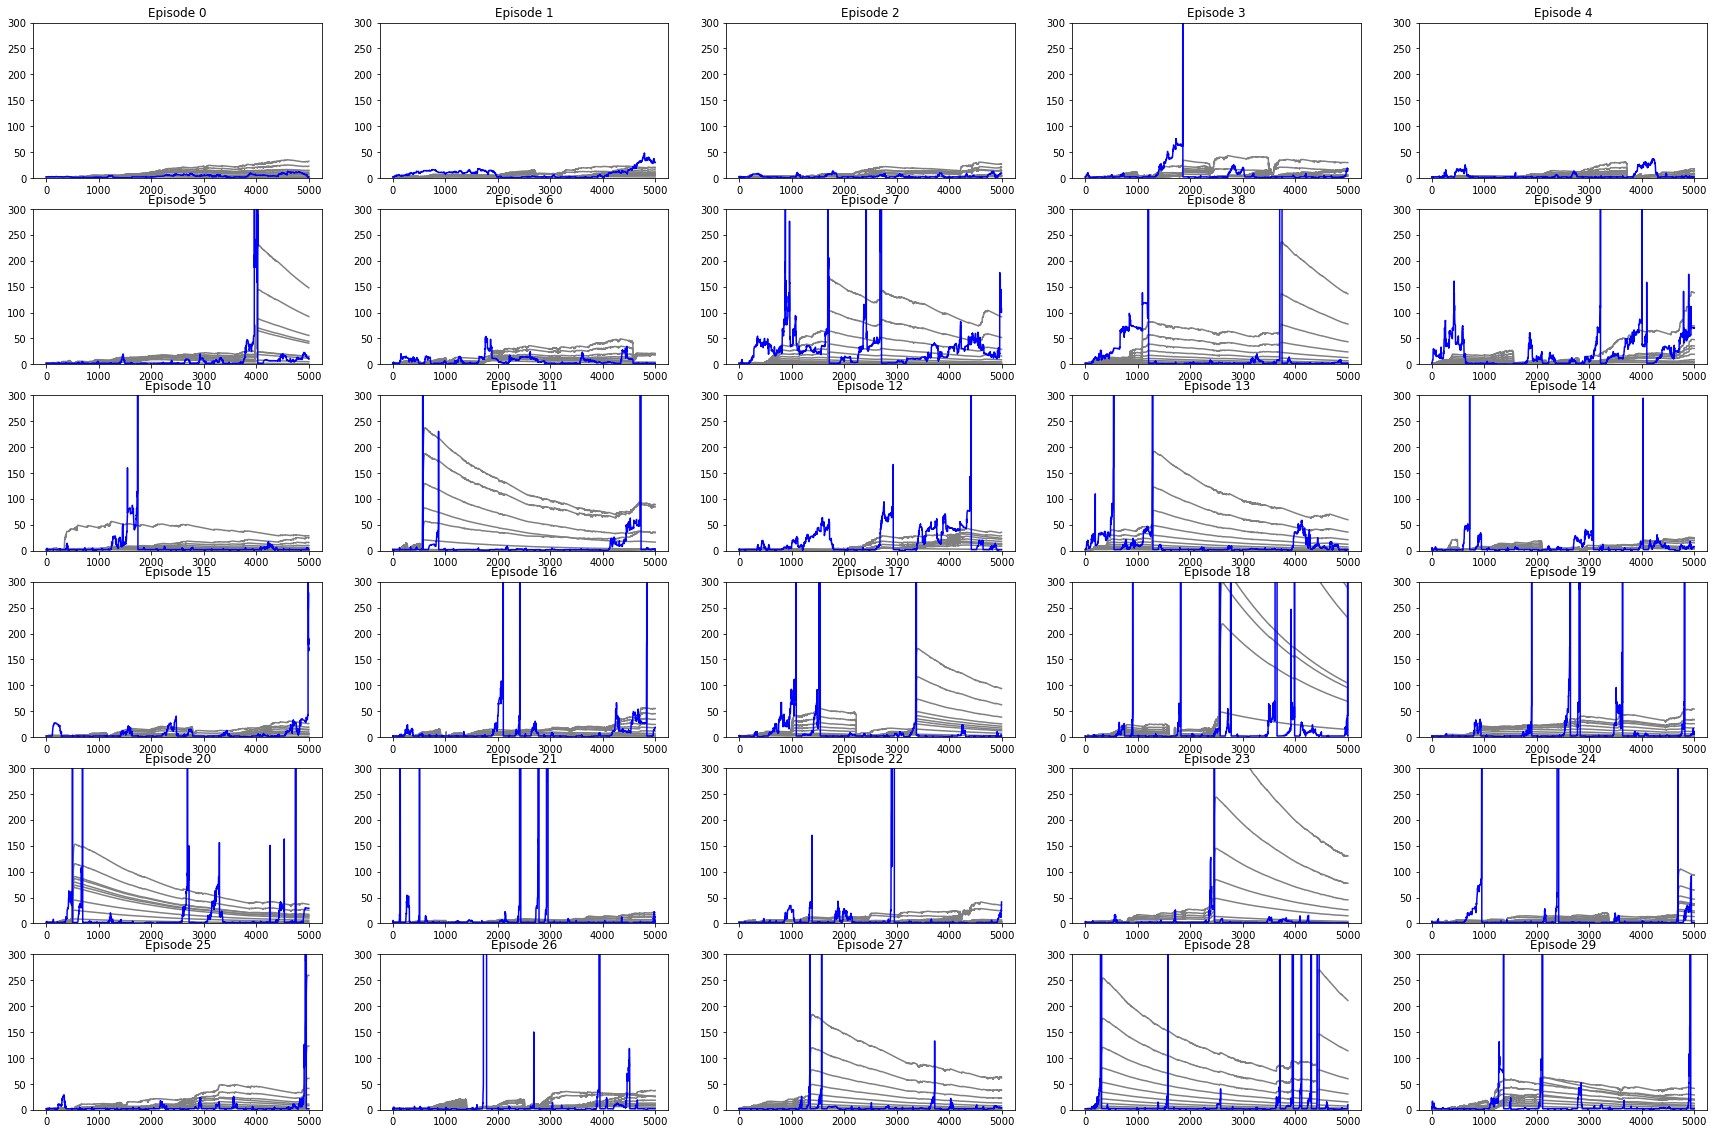

In [8]:
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=6, ncols=5,
                         #sharex=True, sharey=True,
                         figsize=(30,20)
                        )

for i, ax in enumerate(axes.flatten()):
    
    ax.set_ylim([0,300])
    
    for j in range(11):
        episode = np.array(funds_wealth_all_episodes[i])
        if j == 10:
            ax.plot(episode.T[j], color='blue')
        else:
            ax.plot(episode.T[j], color='gray')
        
    ax.set_title("Episode {}".format(i), #{'fontsize':20}
                )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

# Saving
#fig.savefig("./figures/{}_total_wealth.png".format(experiment_name))

### Learning Fund

In [9]:
bankruptcies_per_episode = []

for episode_i in learning_fund_stats:
    bankruptcies = 0
    wealth = episode_i.T[2]
    for t in range(len(wealth)):
        if (wealth[t] == 2.) and (wealth[t-1] != 2.):
            bankruptcies += 1

    bankruptcies_per_episode.append(bankruptcies)

In [10]:
bankruptcies_per_episode

[2,
 6,
 17,
 20,
 18,
 19,
 14,
 3,
 16,
 12,
 32,
 19,
 16,
 14,
 24,
 21,
 23,
 21,
 24,
 27,
 24,
 31,
 27,
 24,
 33,
 26,
 28,
 26,
 25,
 27,
 23,
 29,
 31,
 33,
 30,
 25,
 30,
 28,
 28,
 29,
 31,
 30,
 29,
 28,
 27,
 27,
 31,
 25,
 28,
 32,
 30,
 26,
 33,
 33,
 31,
 27,
 29,
 32,
 35,
 30,
 32,
 30,
 28,
 31,
 29,
 32,
 30,
 30,
 27,
 30,
 35,
 37,
 28,
 25,
 33,
 31,
 31,
 26,
 32,
 26,
 31,
 29,
 30,
 35,
 30,
 32,
 33,
 26,
 32,
 23,
 36,
 27,
 26,
 37,
 29,
 32,
 31,
 31,
 29,
 33,
 27,
 32,
 30,
 32,
 26,
 31,
 32,
 32,
 33,
 32,
 38,
 30,
 34,
 36,
 29,
 34,
 30,
 33,
 31,
 28,
 36,
 30,
 29,
 33,
 28,
 33,
 30,
 34,
 36,
 32,
 30,
 31,
 34,
 35,
 30,
 36,
 35,
 35,
 35,
 32,
 34,
 30,
 30,
 36,
 38,
 35,
 38,
 38,
 33,
 36,
 34,
 35,
 28,
 36,
 31,
 32,
 33,
 36,
 28,
 34,
 30,
 33,
 35,
 33,
 35,
 33,
 31,
 32,
 35,
 34,
 33,
 35,
 29,
 30,
 31,
 30,
 33,
 30,
 33,
 33,
 33,
 37,
 29,
 27,
 25,
 28,
 29,
 34,
 34,
 35,
 34,
 35,
 36,
 31,
 37,
 33,
 27,
 37,
 31,
 34,
 31

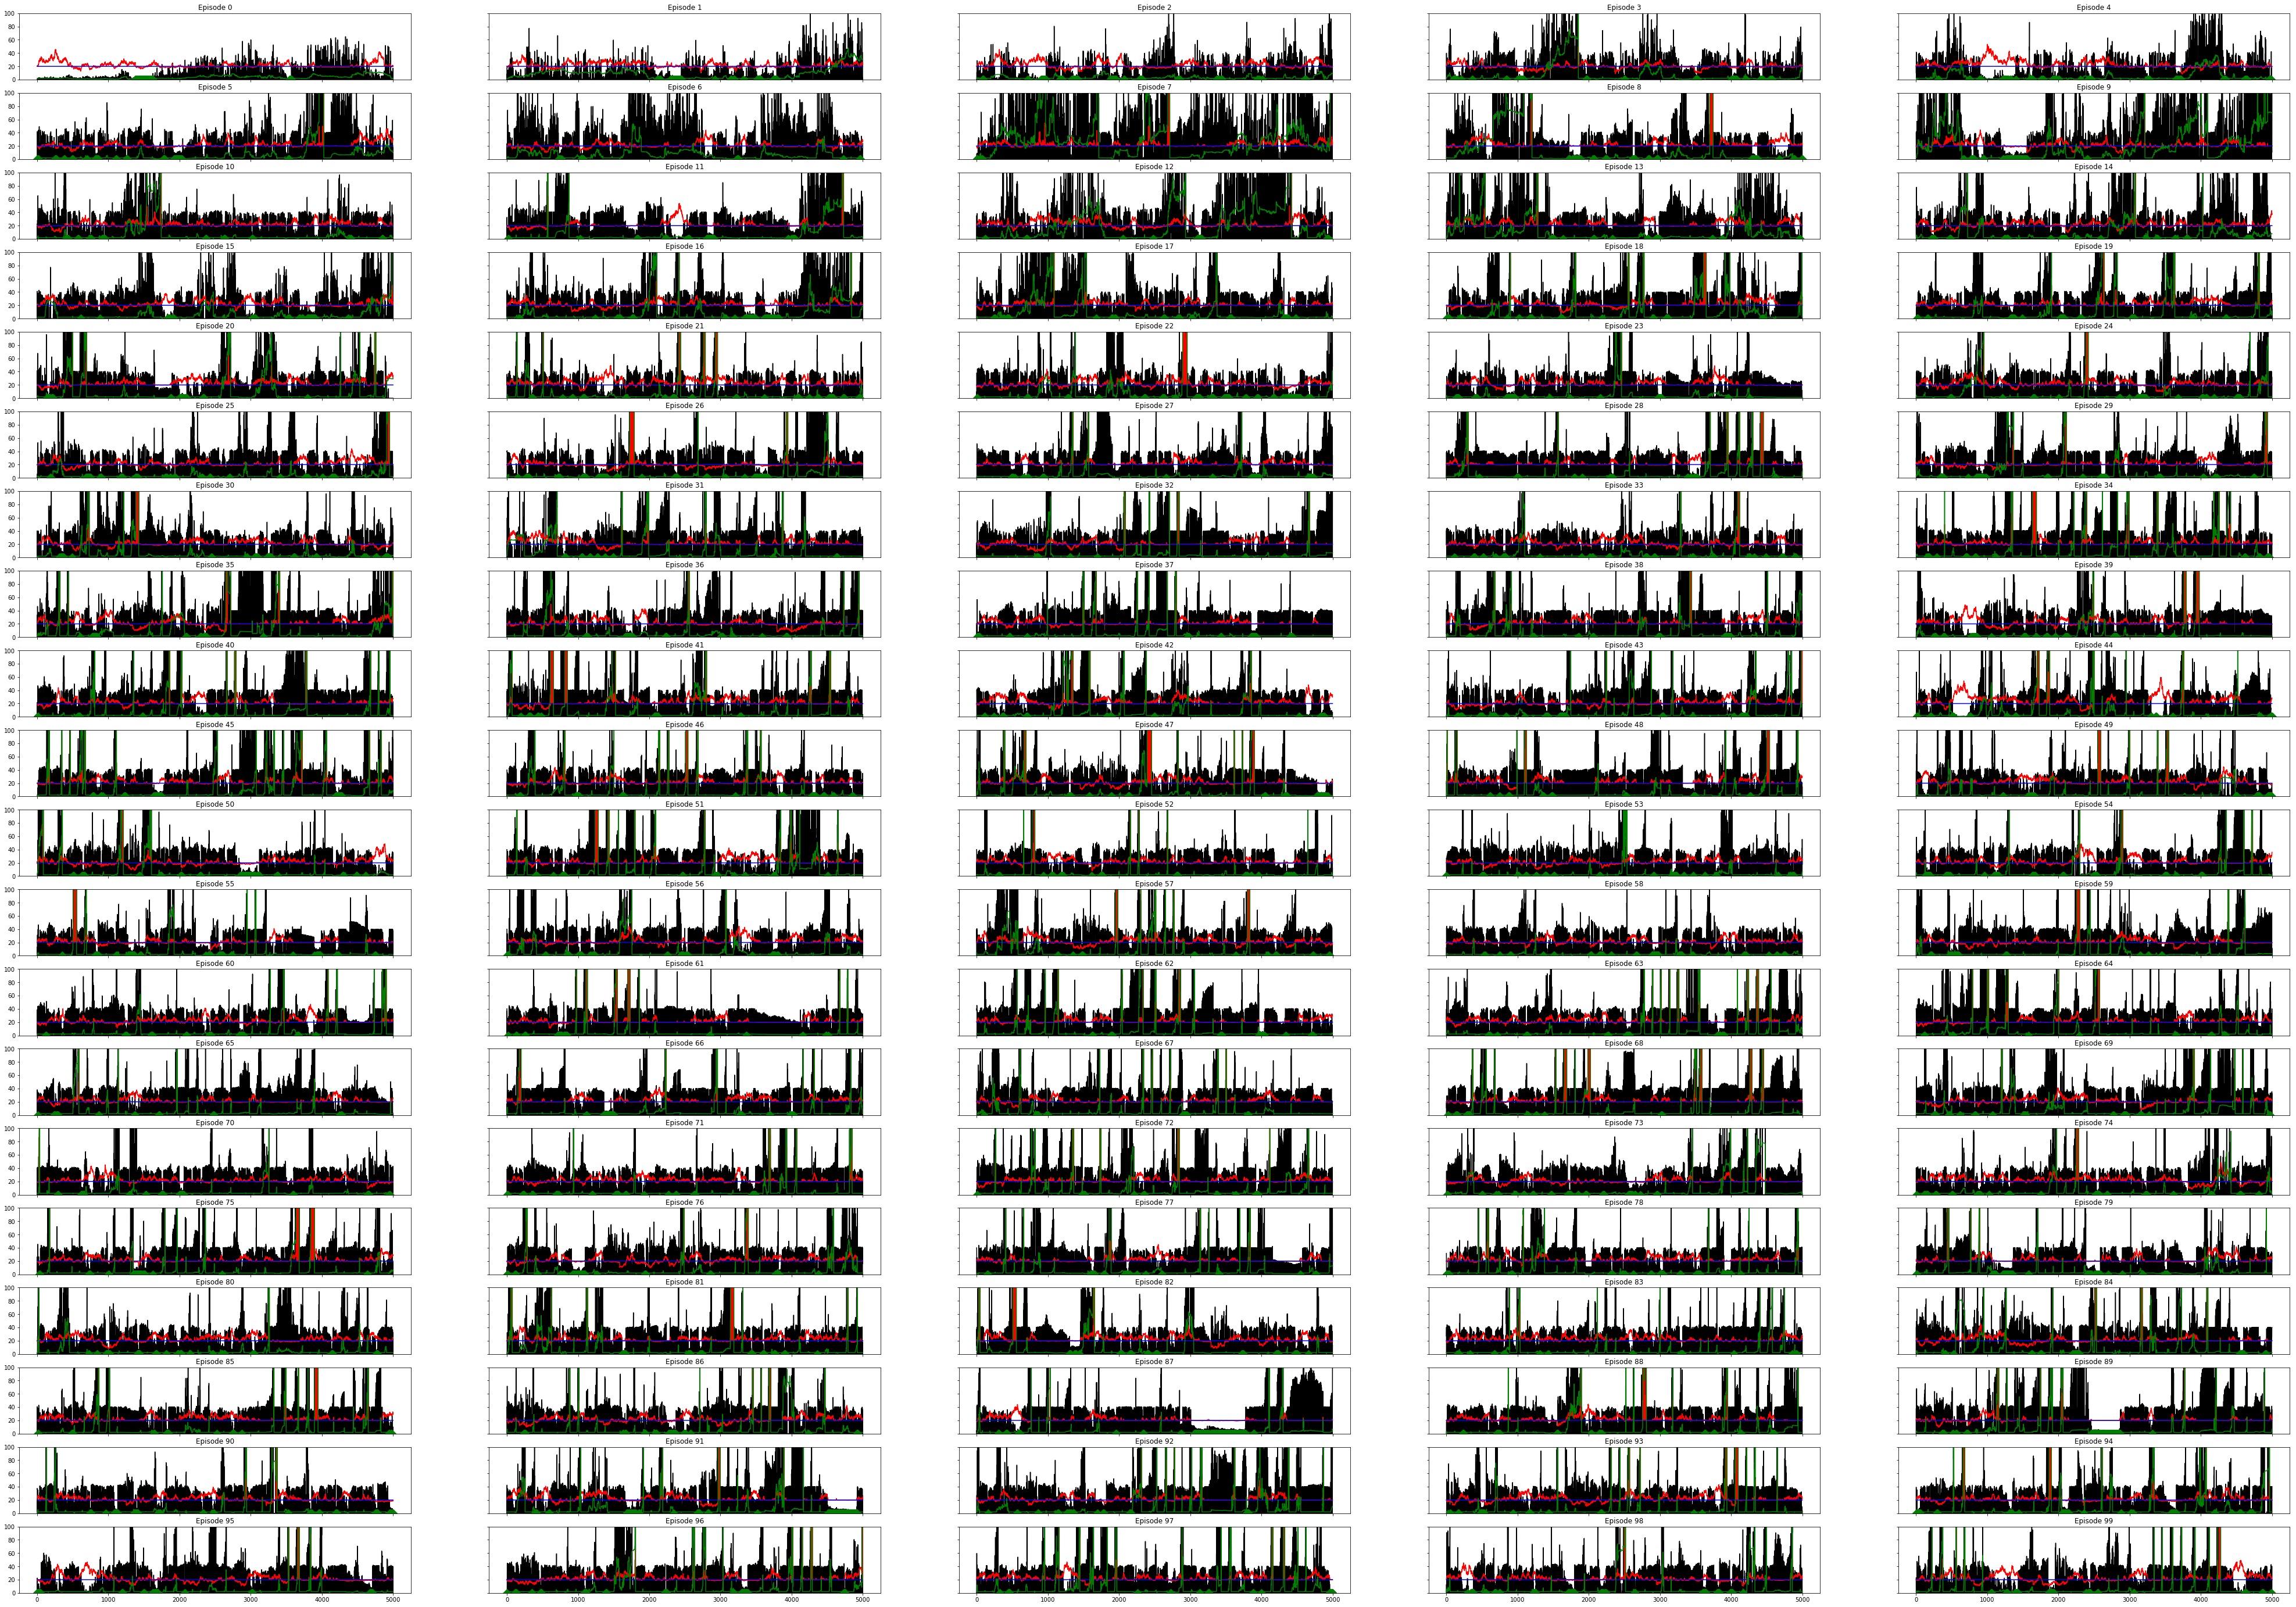

In [15]:
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=20, ncols=5,
                         sharex=True,sharey=True,
                         figsize=(70,50)
                        )



for i, ax in enumerate(axes.flatten()):
        
        ax.set_ylim([0,100])
        
        episode = learning_fund_stats[i]
        
        price = episode.T[0]*20
        demand = episode.T[1] 
        wealth = episode.T[2]
        
        ax.plot(demand, color='black')
        
        ax.plot(price, color='red')
        
        # mark fundamental value
        ax.plot(np.linspace(20,20,5000), color='blue')
        
        ax.plot(wealth, 'g')
        
        # mark default cases
        markers_on = [i for i in range(len(wealth)) if wealth[i] <= 0.5]
        ax.plot(np.linspace(0,0,5000), 'gD',
                markersize=10, markevery=markers_on)
        
        ax.plot()
        
        ax.set_title("Episode {}".format(i), #{'fontsize':20}
                    )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

(5000,)


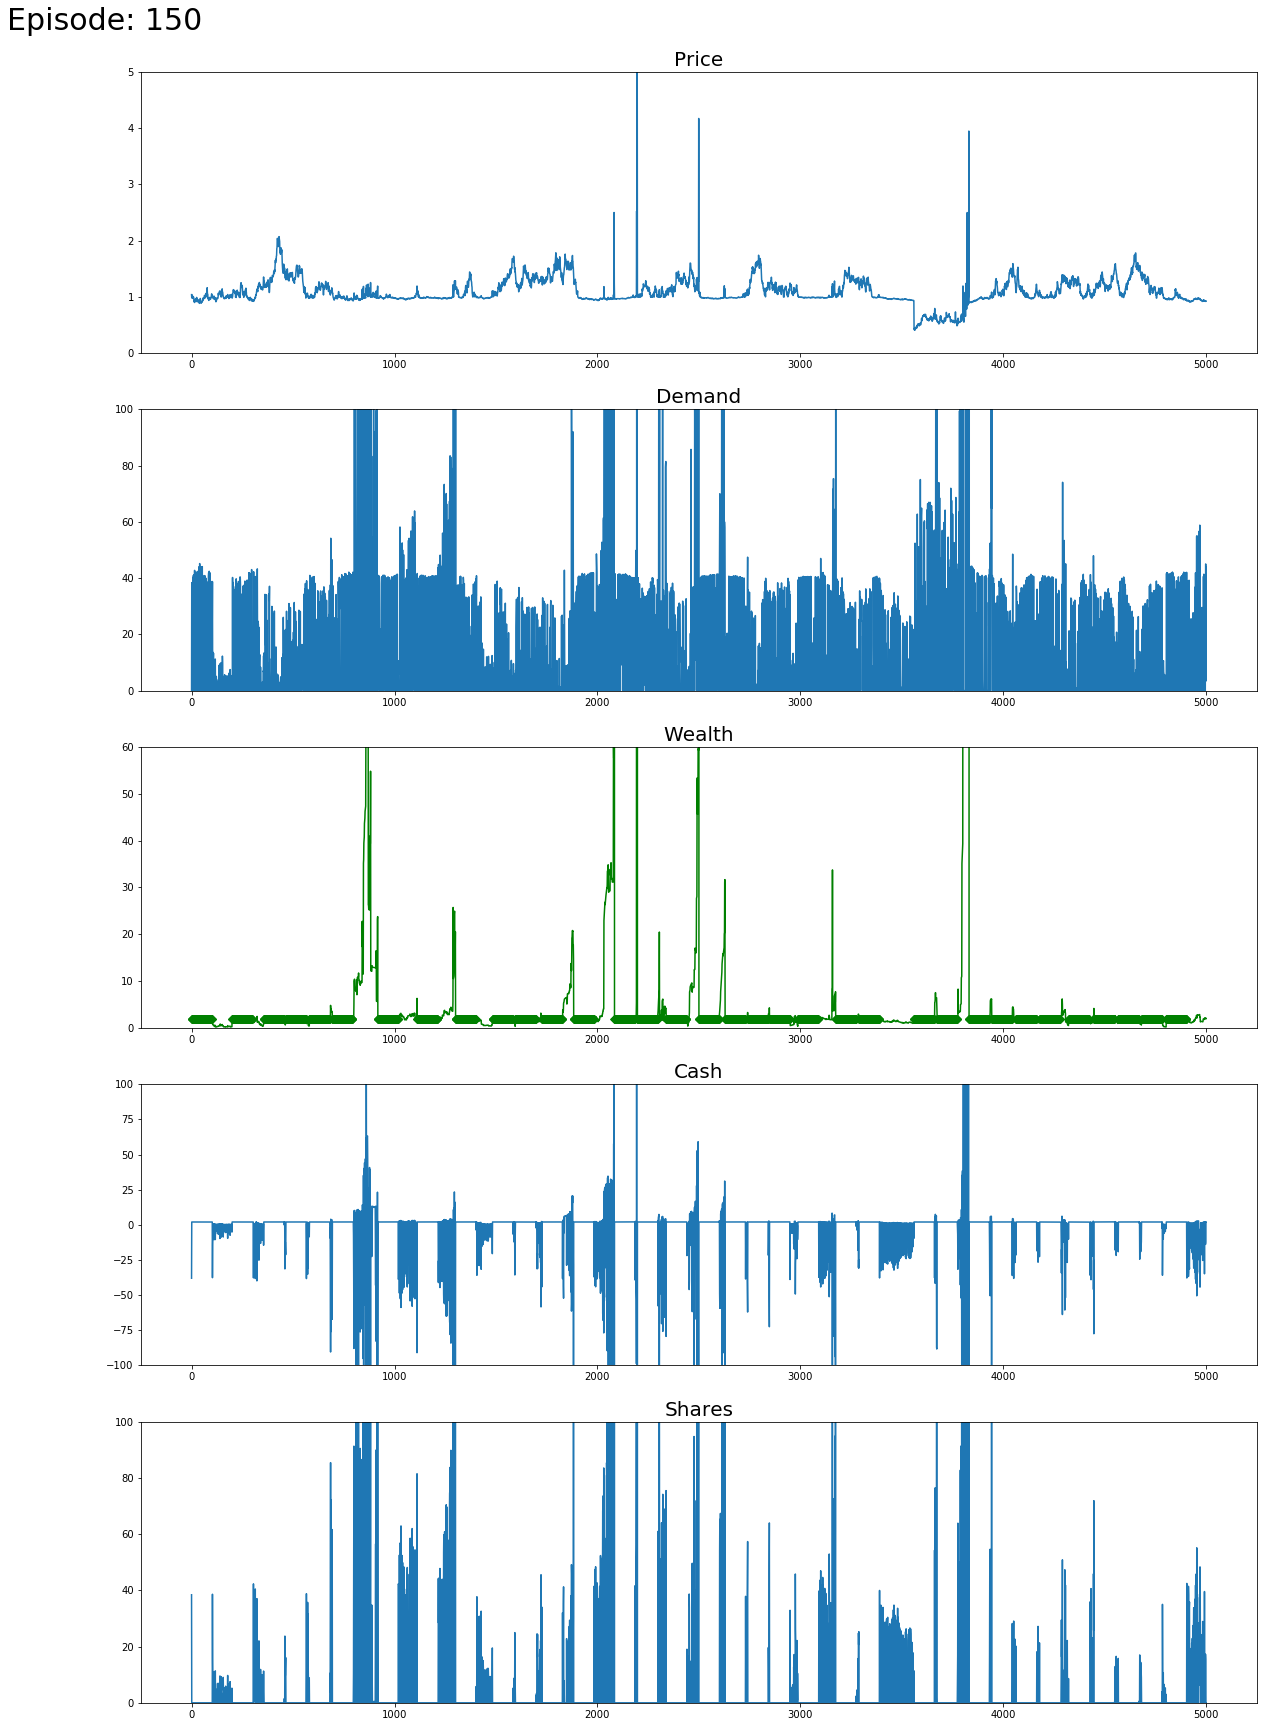

In [26]:
variables = ['Price', 'Demand', 'Wealth', 'Cash', 'Shares']

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(20,30))

episode_to_look_at = 150 

for i, ax in enumerate(axes.flatten()):
    
    variable = i
    
    episode = learning_fund_stats[episode_to_look_at]
    
    # price
    if i == 0:  
        ax.set_ylim([0,5])
        ax.plot(episode.T[i])
        
    # demand
    elif i == 1:
        ax.set_ylim([0,100])
        ax.plot(episode.T[i])
        
    # wealth
    elif i == 2:
        print(episode.T[i].shape)
        ax.set_ylim([0,60])
        markers_on = [k for k in range(len(episode.T[i])) if episode.T[i][k] == 2]   
        ax.plot(episode.T[i],'-gD', markersize=5, markevery=markers_on)
    
    # cash
    elif i == 3:
        ax.set_ylim([-100,100])
        ax.plot(episode.T[i])
    
    # shares
    else:
        ax.set_ylim([0,100])
        ax.plot(episode.T[i])
        
    ax.set_title(variables[i], {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("Episode: {}".format(episode_to_look_at),
             fontsize=30, x=0.1, y=0.91);

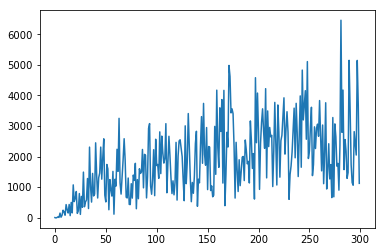

In [16]:
plt.plot(stats);